<a href="https://colab.research.google.com/github/dxv2k/Machine_Learning_CS114/blob/LAB02/Colab__LAB03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
print('Import libraries successfully')

Import libraries successfully


# Đọc dữ liệu và quan sát nhanh dữ liệu California Housing Prices đã được chia thành 3 tập Train, Dev, và Test
* Lệnh ``pd.read_csv()`` tham khảo tại trang 47 trong sách Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
* Lệnh ``df.head()`` tham khảo tại trang 47 trong sách Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow
* Lệnh ``df.info()`` tham khảo tại trang 47 trong sách Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow

In [0]:
df_train = pd.read_csv('housing_train.csv') # Đọc dữ liệu tập Train (Tập dữ liệu việc huấn luyện mô hình)
df_dev = pd.read_csv('housing_dev.csv')     # Đọc dữ liệu tập Dev   (Tập dữ liệu dành cho việc phát triển/tinh chỉnh mô hình)
df_test = pd.read_csv('housing_test.csv')   # Đọc dữ liệu tập Test  (Tập dữ liệu dành cho việc kiểm tra mô hình)

In [60]:
df_train.info() # Kiểm tra thông tin ban đầu dữ liệu (số dòng, số cột, kiểu dữ liệu của các cột)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14447 entries, 0 to 14446
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14447 non-null  float64
 1   latitude            14447 non-null  float64
 2   housing_median_age  14447 non-null  float64
 3   total_rooms         14447 non-null  float64
 4   total_bedrooms      14287 non-null  float64
 5   population          14447 non-null  float64
 6   households          14447 non-null  float64
 7   median_income       14447 non-null  float64
 8   median_house_value  14447 non-null  float64
 9   ocean_proximity     14447 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [61]:
df_train.head() # Quan sát nhanh 5 dòng dữ liệu đầu tiên

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.83,34.15,20.0,2421.0,306.0,1023.0,298.0,8.0683,451500.0,INLAND
1,-119.85,36.77,27.0,1510.0,344.0,847.0,295.0,2.9315,83200.0,INLAND
2,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
3,-119.81,34.46,22.0,3488.0,452.0,1479.0,458.0,7.1687,384400.0,NEAR OCEAN
4,-120.47,34.65,32.0,2193.0,430.0,1074.0,377.0,2.3333,130200.0,NEAR OCEAN


In [62]:
df_dev.info() # Kiểm tra thông tin ban đầu dữ liệu (số dòng, số cột, kiểu dữ liệu của các cột)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2065 non-null   float64
 1   latitude            2065 non-null   float64
 2   housing_median_age  2065 non-null   float64
 3   total_rooms         2065 non-null   float64
 4   total_bedrooms      2048 non-null   float64
 5   population          2065 non-null   float64
 6   households          2065 non-null   float64
 7   median_income       2065 non-null   float64
 8   median_house_value  2065 non-null   float64
 9   ocean_proximity     2065 non-null   object 
dtypes: float64(9), object(1)
memory usage: 161.5+ KB


In [63]:
df_dev.head() # Quan sát nhanh 5 dòng dữ liệu đầu tiên

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.36,33.92,26.0,3695.0,1144.0,2308.0,1009.0,2.6667,229300.0,<1H OCEAN
1,-118.41,34.19,45.0,1106.0,225.0,595.0,228.0,3.6625,190700.0,<1H OCEAN
2,-122.48,37.73,38.0,3195.0,828.0,2410.0,778.0,3.1359,350000.0,NEAR OCEAN
3,-117.18,32.76,8.0,3694.0,997.0,1297.0,807.0,3.6492,158900.0,NEAR OCEAN
4,-117.15,33.14,15.0,1070.0,208.0,470.0,217.0,2.3062,158900.0,<1H OCEAN


In [64]:
df_test.info() # Kiểm tra thông tin ban đầu dữ liệu (số dòng, số cột, kiểu dữ liệu của các cột)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4098 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 322.6+ KB


In [65]:
df_test.head() # Quan sát nhanh 5 dòng dữ liệu đầu tiên

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.41,37.65,32.0,3436.0,868.0,2583.0,817.0,3.5039,232400.0,NEAR OCEAN
1,-117.91,33.84,25.0,1021.0,252.0,975.0,258.0,3.1250,168100.0,<1H OCEAN
2,-118.35,34.08,52.0,1801.0,313.0,714.0,293.0,4.6838,479000.0,<1H OCEAN
3,-121.02,37.61,33.0,1469.0,370.0,1318.0,349.0,1.7104,59000.0,INLAND
4,-117.65,34.10,30.0,1461.0,341.0,1014.0,345.0,2.4667,106000.0,INLAND


# Tách thuộc tính "median_house_value" để làm thuộc tính cần dự đoán  cho bài toán hồi quy tuyến tính (Y), các thuộc tính còn lại là dữ kiện (X).
* Lệnh ``df.drop()`` tham khảo tại trang sách số 63 sách tham khảo Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow

In [0]:
train_X = df_train.drop("median_house_value", axis=1)
train_Y = df_train["median_house_value"].copy()
# del df_train

dev_X = df_dev.drop("median_house_value", axis=1)
dev_Y = df_dev["median_house_value"].copy()
# del df_dev

test_X = df_test.drop("median_house_value", axis=1)
test_Y = df_test["median_house_value"].copy()
# del df_test

# Kiểm tra các thuộc tính bị khuyết giá trị trong tập Train
* Chúng ta có thể cả các lệnh ``df.isnull()`` hoặc ``df.isna()`` để chỉ giá trị bị khuyết (``True``) / không bị khuyết (``False``)
* Chúng ta dùng tiếp lệnh ``arr.any(axis=1)`` để trả về các dòng chỉ chứa một cột có giá trị ``True``/``False`` nếu các cột chỉ cần tồn tại một thuộc tính ``True``
* Chúng ta tính tổng các dòng kết quả trên bằng lệnh ``arr.sum(axis=0)`` sẽ biết được số trường hợp bị khuyết của mỗi thuộc tính

In [67]:
train_X.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14442,False,False,False,False,False,False,False,False,False
14443,False,False,False,False,False,False,False,False,False
14444,False,False,False,False,False,False,False,False,False
14445,False,False,False,False,False,False,False,False,False


In [68]:
train_X.isnull().any(axis=1)
# train_X.isna().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
14442    False
14443    False
14444    False
14445    False
14446    False
Length: 14447, dtype: bool

In [69]:
train_X[train_X.isnull().any(axis=1)]
# train_X[train_X.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
41,-124.00,40.92,29.0,1429.0,NaN,672.0,266.0,2.9485,<1H OCEAN
204,-120.97,37.43,27.0,1380.0,NaN,810.0,262.0,2.1875,INLAND
403,-118.27,34.07,27.0,1190.0,NaN,1795.0,422.0,1.7016,<1H OCEAN
413,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917,INLAND
586,-121.30,38.58,16.0,1537.0,NaN,1125.0,375.0,2.6471,INLAND
...,...,...,...,...,...,...,...,...,...
13865,-121.75,37.11,18.0,3167.0,NaN,1414.0,482.0,6.8773,<1H OCEAN
13918,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN
14004,-122.08,37.37,29.0,1229.0,NaN,707.0,194.0,7.1108,NEAR BAY
14168,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,INLAND


In [70]:
train_X.isnull().sum(axis = 0)
# train_X.isna().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        160
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

# Xử lý các cột bị khuyết dữ liệu trên tập Train
1. Phương án 1: Xóa toàn bộ một dòng có cột dữ liệu bị khuyết
2. Phương án 2: Thay thế giá trị số bằng cách dùng trung bình cộng (``mean``) của toàn cột dữ liệu đó
    * Cách xử lý 1: Dùng lớp ``SimpleImputer`` từ thư viện ``sklearn.impute``
    * Cách xử lý 2: Cách hai thực hiện một số thao tác trên cột

Các bạn có thể tham khảo tại trang số 63 sách Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow

In [0]:
# Cách 1:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(train_X["total_bedrooms"].values.reshape(-1, 1))
tmp_total_bedrooms = imputer_mean.transform(train_X['total_bedrooms'].values.reshape(-1, 1))

In [72]:
# Cách 2:
idx_null = train_X["total_bedrooms"].isnull() # kiểm tra giá trị khuyết
mean_total_bedrooms = train_X["total_bedrooms"][train_X["total_bedrooms"].isna() == False].mean() # tính trung bình cộng các giá trị không bị khuyết
train_X["total_bedrooms"].fillna(mean_total_bedrooms, inplace=True) # thay thế các dòng không bị khuyết bởi giá trị trung bình
print(train_X["total_bedrooms"][idx_null == True]) # in ra màn hình giá trị các dòng bị khuyết ban đầu để kiểm tra

41       538.66578
204      538.66578
403      538.66578
413      538.66578
586      538.66578
           ...    
13865    538.66578
13918    538.66578
14004    538.66578
14168    538.66578
14371    538.66578
Name: total_bedrooms, Length: 160, dtype: float64


In [73]:
print((train_X["total_bedrooms"] == tmp_total_bedrooms.squeeze()).all()) # Kiểm tra kết quả Cách 1 và Cách 2 có giống nhau hay không?

print((train_X["total_bedrooms"].isna() == False).all()) # Kiểm tra kết quả sau khi áp dụng Cách 2 còn giá trị nào bị khuyết hay không?

True
True


# Yêu cầu 1: Xử lý các cột bị khuyết dữ liệu trên tập Dev/Test

### Xử lí development set 

In [74]:
# Take a look at empty element 
dev_X.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2060,False,False,False,False,False,False,False,False,False
2061,False,False,False,False,False,False,False,False,False
2062,False,False,False,False,False,False,False,False,False
2063,False,False,False,False,False,False,False,False,False


In [75]:
#Return row-only that has empty element
dev_X.isnull().any(axis = 1)

0       False
1       False
2       False
3       False
4       False
        ...  
2060    False
2061    False
2062    False
2063    False
2064    False
Length: 2065, dtype: bool

In [76]:
#Return empty row elements (also their attribute)
dev_X[dev_X.isnull().any(axis = 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
91,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN
234,-122.38,37.73,40.0,543.0,NaN,259.0,89.0,2.2167,NEAR BAY
264,-118.16,34.01,40.0,1552.0,NaN,1919.0,427.0,2.2596,<1H OCEAN
365,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,INLAND
405,-117.64,33.45,26.0,1528.0,NaN,607.0,218.0,6.2871,NEAR OCEAN
734,-117.09,32.77,31.0,3062.0,NaN,1263.0,539.0,3.0875,NEAR OCEAN
830,-118.25,33.94,43.0,793.0,NaN,736.0,231.0,0.8527,<1H OCEAN
868,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN
1246,-119.78,36.82,25.0,5016.0,NaN,2133.0,928.0,3.6250,INLAND
1290,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,NEAR BAY


In [77]:
#Return attribute with total empty row contains it
dev_X.isnull().sum(axis = 0)

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        17
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [0]:
# Method 1: Implement SimpleSimpleImputter class
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(dev_X["total_bedrooms"].values.reshape(-1, 1))
tmp_total_bedrooms = imputer_mean.transform(dev_X['total_bedrooms'].values.reshape(-1, 1))

In [79]:
# Method 2: Replace empty element with mean value of their whole attribute in dataset
idx_null = dev_X["total_bedrooms"].isnull() # kiểm tra giá trị khuyết
mean_total_bedrooms = dev_X["total_bedrooms"][dev_X["total_bedrooms"].isna() == False].mean() # tính trung bình cộng các giá trị không bị khuyết
dev_X["total_bedrooms"].fillna(mean_total_bedrooms, inplace=True) # thay thế các dòng không bị khuyết bởi giá trị trung bình
print(dev_X["total_bedrooms"][idx_null == True]) # in ra màn hình giá trị các dòng bị khuyết ban đầu để kiểm tra

91      543.332031
234     543.332031
264     543.332031
365     543.332031
405     543.332031
734     543.332031
830     543.332031
868     543.332031
1246    543.332031
1290    543.332031
1301    543.332031
1618    543.332031
1845    543.332031
1904    543.332031
1905    543.332031
1954    543.332031
2013    543.332031
Name: total_bedrooms, dtype: float64


In [80]:
#Comparison between 2 methods
print((dev_X["total_bedrooms"] == tmp_total_bedrooms.squeeze()).all()) # Kiểm tra kết quả Cách 1 và Cách 2 có giống nhau hay không?
print((dev_X["total_bedrooms"].isna() == False).all()) # Kiểm tra kết quả sau khi áp dụng Cách 2 còn giá trị nào bị khuyết hay không?

True
True


### Tương tự đối với test set ta sẽ rút ngắn quá trình làm 


In [81]:
# Check attributes with empty elements
test_X.isnull().sum(axis = 0)

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        30
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [0]:
# Implement SimpleSimpleImputter class
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(test_X["total_bedrooms"].values.reshape(-1, 1))
tmp_total_bedrooms = imputer_mean.transform(test_X['total_bedrooms'].values.reshape(-1, 1))

In [83]:
# Replace empty element with mean value of their whole attribute in dataset
idx_null = test_X["total_bedrooms"].isnull() # kiểm tra giá trị khuyết
mean_total_bedrooms = test_X["total_bedrooms"][test_X["total_bedrooms"].isna() == False].mean() # tính trung bình cộng các giá trị không bị khuyết
test_X["total_bedrooms"].fillna(mean_total_bedrooms, inplace=True) # thay thế các dòng không bị khuyết bởi giá trị trung bình
print(test_X["total_bedrooms"][idx_null == True]) # in ra màn hình giá trị các dòng bị khuyết ban đầu để kiểm tra

440     532.368716
725     532.368716
815     532.368716
849     532.368716
860     532.368716
920     532.368716
1116    532.368716
1124    532.368716
1453    532.368716
1480    532.368716
1618    532.368716
1622    532.368716
1668    532.368716
1692    532.368716
1696    532.368716
1793    532.368716
1801    532.368716
1845    532.368716
1967    532.368716
2127    532.368716
2190    532.368716
2369    532.368716
2795    532.368716
2939    532.368716
3057    532.368716
3065    532.368716
3068    532.368716
3278    532.368716
3797    532.368716
4019    532.368716
Name: total_bedrooms, dtype: float64


In [84]:
#Comparison between 2 methods
print((test_X["total_bedrooms"] == tmp_total_bedrooms.squeeze()).all()) # Kiểm tra kết quả Cách 1 và Cách 2 có giống nhau hay không?
print((test_X["total_bedrooms"].isna() == False).all()) # Kiểm tra kết quả sau khi áp dụng Cách 2 còn giá trị nào bị khuyết hay không?

True
True


### Đã thực hiện kiểm tra đối với train_Y, test_Y, dev_Y và không phát hiện thấy thành phần nào bị rỗng

In [85]:
print(dev_Y.isnull().sum(axis = 0),
      train_Y.isnull().sum(axis = 0),
      test_Y.isnull().sum(axis = 0))

0 0 0


# Yêu cầu 2: Thực hiện các thí nghiệm với việc thêm các thuộc tính tích lũy dẫn
Chúng ta có danh sách các thuộc tính: ``longitude``, ``latitude``, ``housing_median_age``, ``total_rooms``, ``total_bedrooms``, ``population``, ``households``, ``median_income``, ``ocean_proximity``

1. Thí nghiệm 1: ``longitude``
2. Thí nghiệm 2: ``longitude``, ``latitude``
3. Thí nghiêm 3: ``longitude``, ``latitude``, ``housing_median_age``
4. Thí nghiệm 4: v.v...

Lưu ý: Trong quá trình làm, các bạn sẽ tham khảo cách xử lý thuộc tính ``ocean_proximity`` bằng lớp ``LabelEncoder`` từ thư viện ``sklearn.preprocessing``

In [0]:
#model1
features_list_1 = ["longitude"]
model_1 = sm.OLS(train_Y, train_X[features_list_1]).fit()
rmse_train_1 = mean_squared_error(train_Y, model_1.predict(train_X[features_list_1]), squared=False)
# If True returns MSE value, if False returns RMSE value.
rmse_dev_1 = mean_squared_error(dev_Y, model_1.predict(dev_X[features_list_1]), squared=False)
rmse_test_1 = mean_squared_error(test_Y, model_1.predict(test_X[features_list_1]), squared=False)

In [0]:
#model2
features_list_2 = ["longitude", "latitude"]
model_2 = sm.OLS(train_Y, train_X[features_list_2]).fit()
rmse_train_2 = mean_squared_error(train_Y, model_2.predict(train_X[features_list_2]), squared=False)
rmse_dev_2 = mean_squared_error(dev_Y, model_2.predict(dev_X[features_list_2]), squared=False)
rmse_test_2 = mean_squared_error(test_Y, model_2.predict(test_X[features_list_2]), squared=False)

### Trước khi đi sâu vào với việc thêm các thuộc tính tích lũy dần, ta quan sát mối quan hệ giữa các thành phần trong dataset trước tiên để thực hiện thí nghiệm

In [88]:
#Create dataframe contains all data (dev,test,train)
df_copy = df_train.copy()
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.83,34.15,20.0,2421.0,306.0,1023.0,298.0,8.0683,451500.0,INLAND
1,-119.85,36.77,27.0,1510.0,344.0,847.0,295.0,2.9315,83200.0,INLAND
2,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
3,-119.81,34.46,22.0,3488.0,452.0,1479.0,458.0,7.1687,384400.0,NEAR OCEAN
4,-120.47,34.65,32.0,2193.0,430.0,1074.0,377.0,2.3333,130200.0,NEAR OCEAN


In [89]:
#Append df_dev,df_test to get full dataset
df_copy.append(df_dev)
df_copy.append(df_test)
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.83,34.15,20.0,2421.0,306.0,1023.0,298.0,8.0683,451500.0,INLAND
1,-119.85,36.77,27.0,1510.0,344.0,847.0,295.0,2.9315,83200.0,INLAND
2,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
3,-119.81,34.46,22.0,3488.0,452.0,1479.0,458.0,7.1687,384400.0,NEAR OCEAN
4,-120.47,34.65,32.0,2193.0,430.0,1074.0,377.0,2.3333,130200.0,NEAR OCEAN


In [90]:
corr_matrix = df_copy.corr()
print(corr_matrix['median_house_value'].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.687335
total_rooms           0.137521
housing_median_age    0.092638
households            0.068238
total_bedrooms        0.052734
population           -0.022210
longitude            -0.041026
latitude             -0.147617
Name: median_house_value, dtype: float64


Từ bảng ``corr_matrix`` ta thấy được rằng giá cả nhà ngoài yếu tố vị trí còn có thể phụ thuộc vào: 
*   Mức thu nhập bình quân (``median_income``)
*   Số lượng phòng ngủ (``total_rooms``)
*   Độ tuổi trung bình (``housing_median_age``)

Do chỉ số của các thuộc tính ``population``,``total_bedrooms`` quá thấp nên ta sẽ bỏ qua. Tuy nhiên còn thuộc tính ``ocean_proximity`` ta chưa xem xét đến nên sẽ thực hiện quan ở phần sau.



### Biểu đồ Scatter để mô phỏng điều ta dự đoán và sự tương quan

In [91]:
from pandas.plotting import scatter_matrix
print('Import scatter_matrix successfully')

Import scatter_matrix successfully


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f465e0b7550>,
      dtype=object)

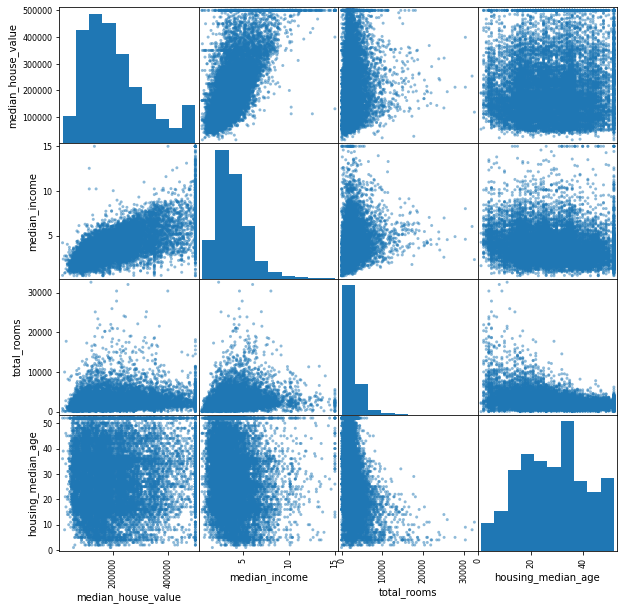

In [92]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df_copy[attributes],figsize = (10,10))

Qua biểu đồ scatter trên ta có thể thấy được rằng một số đặc điểm như sau: 
*   Giá nhà càng cao khi thu nhập trung bình khu vực càng cao
*   Số lượng phòng và giá nhà phụ thuộc vào nhau, từ đây ta có thể tạo ra thêm 1 thuộc tính ``rooms_per_house``
*   Độ tuổi trung bình mua nhà và giá cả nhà dường như không liên quan vì vậy sẽ bỏ qua 

Vậy ta hãy tiến hành thử nghiệm với các thuộc tính ``rooms_per_house``, ``median_income``

In [93]:
# Experiment with room_per_house on full dataset
df_copy['rooms_per_house'] = df_copy['total_rooms']/df_copy['households']
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house
0,-117.83,34.15,20.0,2421.0,306.0,1023.0,298.0,8.0683,451500.0,INLAND,8.124161
1,-119.85,36.77,27.0,1510.0,344.0,847.0,295.0,2.9315,83200.0,INLAND,5.118644
2,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY,5.514196
3,-119.81,34.46,22.0,3488.0,452.0,1479.0,458.0,7.1687,384400.0,NEAR OCEAN,7.615721
4,-120.47,34.65,32.0,2193.0,430.0,1074.0,377.0,2.3333,130200.0,NEAR OCEAN,5.816976


In [94]:
#Check correlation matrix again 
corr_matrix = df_copy.corr()
print(corr_matrix['median_house_value'].sort_values(ascending = False))

median_house_value    1.000000
median_income         0.687335
rooms_per_house       0.151434
total_rooms           0.137521
housing_median_age    0.092638
households            0.068238
total_bedrooms        0.052734
population           -0.022210
longitude            -0.041026
latitude             -0.147617
Name: median_house_value, dtype: float64


Ta thấy rằng thuộc tính ``bedrooms_per_house`` vừa được tạo ra có mối liên hệ với giá nhà cao hơn so với ``total_rooms`` vì thế ta hãy thử áp dụng để training cho model và rồi thực hiện so sánh giữa 2 ``bedrooms_per_house`` và ``total_rooms``

In [0]:
# Add rooms_per_house train,test,dev set
train_X['rooms_per_house'] = train_X['total_rooms']/train_X['households']
dev_X['rooms_per_house'] = dev_X['total_rooms']/dev_X['households']
test_X['rooms_per_house'] = test_X['total_rooms']/test_X['households']

In [0]:
# model 3 room_per_house
# Experiment with feature longtitude, latitude, room_per_house
features_list_3 = ["longitude", "latitude","rooms_per_house"]
model_3 = sm.OLS(train_Y, train_X[features_list_3]).fit()
rmse_train_3 = mean_squared_error(train_Y, model_3.predict(train_X[features_list_3]), squared=False)
rmse_dev_3 = mean_squared_error(dev_Y, model_3.predict(dev_X[features_list_3]), squared=False)
rmse_test_3 = mean_squared_error(test_Y, model_3.predict(test_X[features_list_3]), squared=False)

Tiến hành xây dựng model với thuộc tính ``housing_median_age``


In [0]:
# model 4 housing_median_age
# Experiment with feature longtitude, latitude, housing_median_age
features_list_4 = ["longitude", "latitude","housing_median_age"]
model_4 = sm.OLS(train_Y, train_X[features_list_4]).fit()
rmse_train_4 = mean_squared_error(train_Y, model_4.predict(train_X[features_list_4]), squared=False)
rmse_dev_4 = mean_squared_error(dev_Y, model_4.predict(dev_X[features_list_4]), squared=False)
rmse_test_4 = mean_squared_error(test_Y, model_4.predict(test_X[features_list_4]), squared=False)

Tiến hành xây dựng model với thuộc tính ``median_income``

In [0]:
# model 5 median_income
# Experiment with feature longtitude, latitude, median_income
features_list_5 = ["longitude", "latitude","median_income"]
model_5 = sm.OLS(train_Y, train_X[features_list_5]).fit()
rmse_train_5 = mean_squared_error(train_Y, model_5.predict(train_X[features_list_5]), squared=False)
rmse_dev_5 = mean_squared_error(dev_Y, model_5.predict(dev_X[features_list_5]), squared=False)
rmse_test_5 = mean_squared_error(test_Y, model_5.predict(test_X[features_list_5]), squared=False)

## Ngoài ra, còn thuộc tính ``ocean_proximity``mà ta chưa xét tới
Ta thường thấy rằng vị trí địa lý ảnh hưởng rất nhiều đến giá cả nhà đất và may mắn thay trong dataset đã phân loại các loại vị trí

Bên dưới là 2 đồ thị biểu thị giá nhà và khu vực được phân loại theo vị trí 

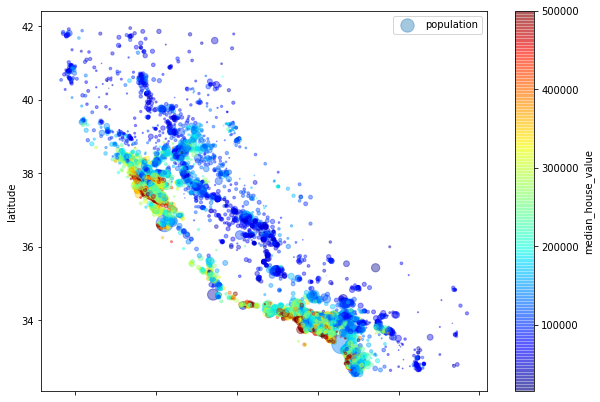

In [99]:
df_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=df_copy["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [100]:
from mlxtend.plotting import category_scatter
print('Import mlxtend.plotting successfully')

Import mlxtend.plotting successfully


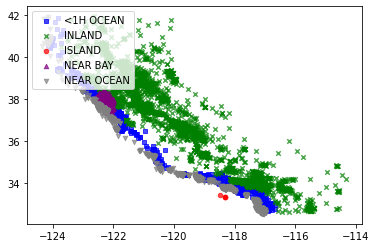

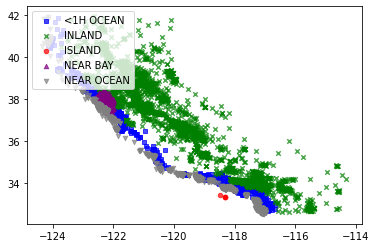

In [101]:
category_scatter(x="longitude", y="latitude", label_col = 'ocean_proximity',
                data = df_copy, legend_loc = 'upper left')

In [0]:
# ENCODE LABEL
# Label encode ocean_proximity
le = LabelEncoder()
# training set 
le.fit(train_X['ocean_proximity'])
train_X['ocean_proximity'] = le.transform(train_X['ocean_proximity'])
dict(zip(le.classes_, le.transform(le.classes_)))
# development set
le.fit(dev_X['ocean_proximity'])
dev_X['ocean_proximity'] = le.transform(dev_X['ocean_proximity'])
# test set
le.fit(test_X['ocean_proximity'])
test_X['ocean_proximity'] = le.transform(test_X['ocean_proximity'])

In [103]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}

In [0]:
# model 6 ocean_proximity
features_list_6 = ["longitude", "latitude","ocean_proximity"]
model_6 = sm.OLS(train_Y, train_X[features_list_6]).fit()
rmse_train_6 = mean_squared_error(train_Y, model_6.predict(train_X[features_list_6]), squared=False)
rmse_dev_6 = mean_squared_error(dev_Y, model_6.predict(dev_X[features_list_6]), squared=False)
rmse_test_6 = mean_squared_error(test_Y, model_6.predict(test_X[features_list_6]), squared=False)

# features_list_5 = ["longitude", "latitude","ocean_proximity"]
# model_5 = sm.OLS(train_Y, train_X[features_list_5]).fit()
# rmse_train_5 = mean_squared_error(train_Y, model_5.predict(train_X[features_list_5]), squared=True)
# rmse_dev_5 = mean_squared_error(dev_Y, model_5.predict(dev_X[features_list_5]), squared=True)
# rmse_test_5 = mean_squared_error(test_Y, model_5.predict(test_X[features_list_5]), squared=True)

Mô hình với tất cả các thuộc tính kết hợp lại với nhau

In [0]:
# model with all atrributes (includes rooms_per_house)
model_all = sm.OLS(train_Y, train_X).fit()
rmse_train_all = mean_squared_error(train_Y, model_all.predict(train_X), squared=False)
rmse_dev_all = mean_squared_error(dev_Y, model_all.predict(dev_X), squared=False)
rmse_test_all = mean_squared_error(test_Y, model_all.predict(test_X), squared=False)

In [0]:
#Delete dataframe after use
del df_train
del df_test
del df_dev
del df_copy

# Yêu cầu 3: Trình bày kết quả mô hình vào một bảng bằng thư viện Pandas

In [108]:
df_result = pd.DataFrame(data = {
                                 'RMSE_Train': [rmse_train_1, rmse_train_2, rmse_train_3,rmse_train_4,rmse_train_5,rmse_train_6,rmse_train_all],
                                 'RMSE_Dev': [rmse_dev_1, rmse_dev_2, rmse_dev_3,rmse_dev_4,rmse_dev_5,rmse_dev_6,rmse_dev_all],
                                 'RMSE_Test': [rmse_test_1, rmse_test_2, rmse_test_3,rmse_test_4,rmse_test_5,rmse_dev_6,rmse_test_all]
                                },
                         index = [
                                  'longitude', #1
                                  'longitude + latitude', #2
                                  'longitude + latitude + room_per_house', #3
                                  'longitude + latitude + housing_median_age', #4
                                  'longitude + latitude + median_income', #5
                                  'longitude + latitude + ocean_proximity', #6
                                  'all attributes', #all, include room_per_house
                                  ])
df_result

,RMSE_Train,RMSE_Dev,RMSE_Test
longitude,114808.126372,114556.559922,117298.758437
longitude + latitude,111492.089953,112236.756821,113827.915011
longitude + latitude + room_per_house,109665.214694,110317.907261,112037.996171
longitude + latitude + housing_median_age,111139.090379,111531.578263,113134.299017
longitude + latitude + median_income,81840.406615,82893.944075,82780.422497
longitude + latitude + ocean_proximity,110795.141323,111942.847206,111942.847206
all attributes,74387.850666,75073.788734,74939.763493


# Yêu cầu 4: Nhận xét các kết quả trên
Qua một vài thử nghiệm đối với việc kết hợp một số thuộc tính với nhau ta thấy rằng: 
*   Ta thấy rõ rằng khi chưa đưa các thuộc tính về cùng khoảng (scale) khiến cho RMSE đưa ra kết quả rất lớn (ví dụ như ``median_house_value `` và ``longtitude, latitude`` ) đây chính là điều ta không muốn
*   Việc tạo ra một số thuộc tính mới có sự liên quan cao hơn thuộc tính đã có tiêu biểu là ``room_per_house`` cũng có ảnh hưởng rất quan trọng đến kết quả của RMSE
*   Ta cũng cần lưu ý lựa chọn kĩ các thuộc tính quan trọng để tính toán và cũng để giảm thiểu khối công việc dư thừa không cần thiết, như ở bảng kết quả RMSE thì ta thấy có các thuộc tính quan trọng như ``longtitude``, ``latitude``, ``median_income`` và ``room_per_house``

# Yêu cầu 5: Thực hiện lại các Yêu cầu 2, 3, 4 khi dùng mô hình ``Support Vector Machine regressor`` (``sklearn.svm.SVR``) để giải quyết bài toán hồi quy tuyến tính 

In [113]:
from sklearn.svm import SVR
print('Import Linear Support Vector Regression successfully') 

Import Linear Support Vector Regression successfully


In [0]:
svm_reg = SVR(kernel="linear", ) #default parameter setting 

Tương tự với các yêu cầu phía trên, ta cũng thử tính toán lại sử dụng các features list ở phía trên

In [0]:
# svr model 1 
modelSVM_1 = svm_reg.fit(train_X[features_list_1],train_Y)
rmseSVM_train_1 = mean_squared_error(train_Y,modelSVM_1.predict(train_X[features_list_1]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_1 = mean_squared_error(test_Y,modelSVM_1.predict(test_X[features_list_1]) , squared=False)
rmseSVM_dev_1 = mean_squared_error(dev_Y,modelSVM_1.predict(dev_X[features_list_1]) , squared=False)

In [0]:
# svr model 2
modelSVM_2 = svm_reg.fit(train_X[features_list_2],train_Y)
rmseSVM_train_2 = mean_squared_error(train_Y,modelSVM_2.predict(train_X[features_list_2]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_2 = mean_squared_error(test_Y,modelSVM_2.predict(test_X[features_list_2]) , squared=False)
rmseSVM_dev_2 = mean_squared_error(dev_Y,modelSVM_2.predict(dev_X[features_list_2]) , squared=False)

In [0]:
# svr model 3
modelSVM_3 = svm_reg.fit(train_X[features_list_3],train_Y)
rmseSVM_train_3 = mean_squared_error(train_Y,modelSVM_3.predict(train_X[features_list_3]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_3 = mean_squared_error(test_Y,modelSVM_3.predict(test_X[features_list_3]) , squared=False)
rmseSVM_dev_3 = mean_squared_error(dev_Y,modelSVM_3.predict(dev_X[features_list_3]) , squared=False)

In [0]:
# svr model 4
modelSVM_4 = svm_reg.fit(train_X[features_list_4],train_Y)
rmseSVM_train_4 = mean_squared_error(train_Y,modelSVM_4.predict(train_X[features_list_4]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_4 = mean_squared_error(test_Y,modelSVM_4.predict(test_X[features_list_4]) , squared=False)
rmseSVM_dev_4 = mean_squared_error(dev_Y,modelSVM_4.predict(dev_X[features_list_4]) , squared=False)

In [0]:
# svr model 5
modelSVM_5 = svm_reg.fit(train_X[features_list_5],train_Y)
rmseSVM_train_5 = mean_squared_error(train_Y,modelSVM_5.predict(train_X[features_list_5]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_5 = mean_squared_error(test_Y,modelSVM_5.predict(test_X[features_list_5]) , squared=False)
rmseSVM_dev_5 = mean_squared_error(dev_Y,modelSVM_5.predict(dev_X[features_list_5]) , squared=False)

In [0]:
# svr model 6
modelSVM_6 = svm_reg.fit(train_X[features_list_6],train_Y)
rmseSVM_train_6 = mean_squared_error(train_Y,modelSVM_6.predict(train_X[features_list_6]) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_6 = mean_squared_error(test_Y,modelSVM_6.predict(test_X[features_list_6]) , squared=False)
rmseSVM_dev_6 = mean_squared_error(dev_Y,modelSVM_6.predict(dev_X[features_list_6]) , squared=False)

In [0]:
# svr model all
modelSVM_all = svm_reg.fit(train_X,train_Y)
rmseSVM_train_all = mean_squared_error(train_Y,modelSVM_all.predict(train_X) , squared=False) # If True returns MSE value, if False returns RMSE value.
rmseSVM_test_all = mean_squared_error(test_Y,modelSVM_all.predict(test_X) , squared=False)
rmseSVM_dev_all = mean_squared_error(dev_Y,modelSVM_all.predict(dev_X) , squared=False)

Thể hiện kết quả của mô hình khi sử dụng ``Support Vector Regression`` 

In [148]:
df_resultSVM = pd.DataFrame(data = {
                                 'rmseSVM_Train': [rmseSVM_train_1, rmseSVM_train_2, rmseSVM_train_3,rmseSVM_train_4,rmseSVM_train_5,rmseSVM_train_6,rmseSVM_train_all],
                                 'rmseSVM_Dev': [rmseSVM_dev_1, rmseSVM_dev_2, rmseSVM_dev_3,rmseSVM_dev_4,rmseSVM_dev_5,rmseSVM_dev_6,rmseSVM_dev_all],
                                 'rmseSVM_Test': [rmseSVM_test_1, rmseSVM_test_2, rmseSVM_test_3,rmseSVM_test_4,rmseSVM_test_5,rmseSVM_dev_6,rmseSVM_test_all]
                                },
                         index = [
                                  'longitude', #1
                                  'longitude + latitude', #2
                                  'longitude + latitude + room_per_house', #3
                                  'longitude + latitude + housing_median_age', #4
                                  'longitude + latitude + median_income', #5
                                  'longitude + latitude + ocean_proximity', #6
                                  'all attributes', #all, include room_per_house
                                  ])
df_resultSVM

,rmseSVM_Train,rmseSVM_Dev,rmseSVM_Test
longitude,117924.545628,117463.850111,120561.631810
longitude + latitude,117146.891674,116903.495457,119738.730333
longitude + latitude + room_per_house,116237.301904,116063.798058,118563.648849
longitude + latitude + housing_median_age,116615.889858,116133.145720,118918.313962
longitude + latitude + median_income,102156.495613,101707.054270,104270.939081
longitude + latitude + ocean_proximity,117008.947362,116852.296766,116852.296766
all attributes,95219.539260,94645.983050,95500.095288


### Nhận xét 
*   Ta thấy rằng việc để thông số mặc định khi sử dụng SVR (epsilon = 0.1, l2 penalty (C) = 1.0) làm cho kết quả trả về sai lệch cao hơn so với khi sử dụng OLS 
*    Vẫn tương tự như nhận xét ở OLS, cần feature scaling để kết quả trả về như ý muốn 
*    Cần lựa chọn các thuộc tính quan trọng thực hiện áp dụng cho mô hình để giảm chi phí tính toán và thời gian tính toán 
*    Thời gian tính toán của SVR lâu hơn rất nhiều so với OLS (sử dụng Google Colab để tính toán)